In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to specify that it's a single channel image (grayscale)
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convert class vectors to binary class matrices (for use with categorical_crossentropy)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 62s 40ms/step - loss: 0.5349 - accuracy: 0.8061 - val_loss: 0.3697 - val_accuracy: 0.8683
Epoch 2/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.3736 - accuracy: 0.8631 - val_loss: 0.3239 - val_accuracy: 0.8805
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.3233 - accuracy: 0.8810 - val_loss: 0.2898 - val_accuracy: 0.8934
Epoch 4/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2959 - accuracy: 0.8906 - val_loss: 0.2662 - val_accuracy: 0.9027
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2734 - accuracy: 0.8983 - val_loss: 0.2715 - val_accuracy: 0.8997
Epoch 6/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2578 - accuracy: 0.9034 - val_loss: 0.2485 - val_accuracy: 0.9077
Epoch 7/10
1500/1500 [==============================] - 44s 30ms/step - loss: 0.2425 - accuracy: 0.9080 - val_loss: 0.2404 -

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.2500 - accuracy: 0.9079
Test accuracy: 0.9078999757766724


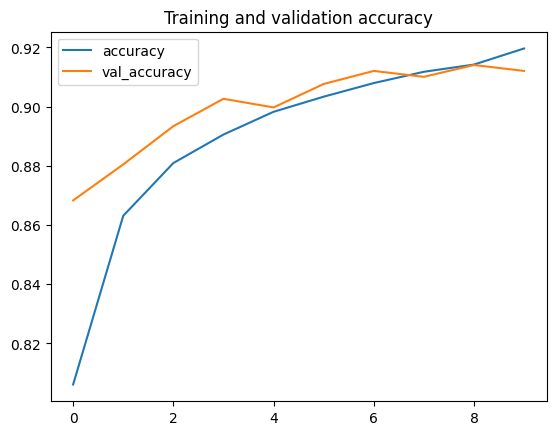

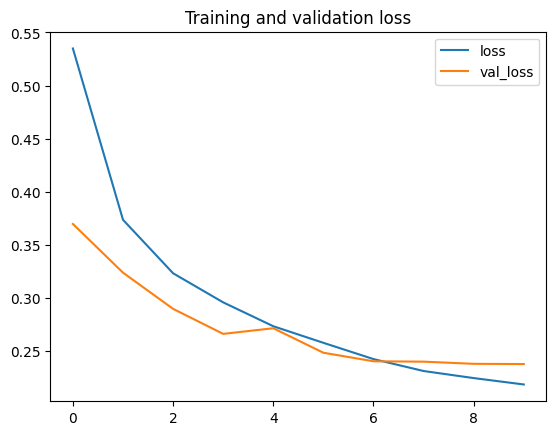

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
